# Titanic Survival Prediction

This notebook walks through the analysis, visualization, and prediction of survival on the Titanic using machine learning models. The dataset is available from the Kaggle Titanic competition, and the objective is to predict survival outcomes based on passenger data.


# Importing Necessary Libraries

In this step, we import the essential libraries required for data analysis, preprocessing, visualization, and machine learning model training and evaluation. Each library serves a specific purpose, as described below:

- **Numpy (`np`)**: A fundamental package for numerical computing in Python, used here for data manipulation and mathematical operations.
- **Pandas (`pd`)**: A powerful library for data manipulation and analysis, enabling us to load, clean, and process the Titanic dataset efficiently.
- **Seaborn (`sns`)** and **Matplotlib (`plt`)**: Visualization libraries used to create insightful graphs and charts for data exploration. `Seaborn` provides a high-level interface for drawing attractive and informative statistical graphics.
- **Scikit-learn (`sklearn`)**: The core machine learning library in Python, providing modules for:
  - **Data Preprocessing**: `OneHotEncoder` for encoding categorical variables.
  - **Model Selection**: `train_test_split` for data splitting, and `GridSearchCV` for hyperparameter tuning.
  - **Metrics**: `accuracy_score`, `classification_report`, and `confusion_matrix` for model evaluation.
  - **Algorithms**: Various classifiers like `RandomForestClassifier`, `LogisticRegression`, `DecisionTreeClassifier`, `SVC`, and more.
- **XGBoost (`XGBClassifier`)**: A popular gradient-boosting framework known for its speed and accuracy in structured/tabular data.
- **CatBoost (`CatBoostClassifier`)**: A gradient-boosting framework that handles categorical features natively and is known for its efficiency and accuracy.
- **Warnings**: `warnings.filterwarnings('ignore')` suppresses warnings for cleaner output, particularly useful when using large models or extensive hyperparameter tuning.

With these libraries imported, we’re ready to load, explore, and preprocess the data, as well as build and evaluate a variety of machine learning models for predicting survival on the Titanic.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import catboost as catboost
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

# Import data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Exploratory Data Analysis

Data overview
- PassengerId: Unique id for each passenger. No effect on the target feature.
- Survived: Whether or not the passenger survived. This is the target feature.
  - 0 = No, 1 = Yes
- Pclass: Reflects the socio-economic status of the passenger.
  - 1 = 1st, Upper Class
  - 2 = 2nd, Middle Class
  - 3 = 3rd, Lower Class
- Name: The name of the passenger. Includes the title of the passenger, such as "Mr.", "Mrs.", and "Master.".
- Sex: Gender of the passenger, either "male" or "female".
- Age: The age of the passenger in years.
- SibSp: # of siblings / spouses aboard the Titanic.
- Parch: # of parents / children aboard the Titanic.
- Ticket: The Ticket number.
- Fare: Passenger fare.
- Cabin: Cabin number of the passenger.
- Embarked: Which port the passenger embarked from.
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.shape

(891, 12)

In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_data.shape

(418, 11)

# Features and Survival

### Age Distribution by Survival Status
This plot compares the age distribution between passengers who survived and those who did not.


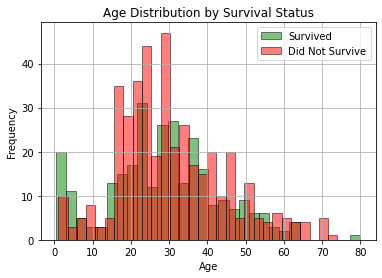

In [9]:
plt.figure(figsize=(6, 4))

plt.hist(train_data[train_data['Survived'] == 1]['Age'], bins=30,
         alpha=0.5, label='Survived', color='green', edgecolor='black')
plt.hist(train_data[train_data['Survived'] == 0]['Age'], bins=30,
         alpha=0.5, label='Did Not Survive', color='red', edgecolor='black')

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()

- Younger passengers, especially those < 5 years old, seem to survive at a higher rate.
- Older passengers seem to have a lower survival rate, especially around 40 - 75 years old.

### Fare Distribution by Survival Status
This plot shows the distribution of fares paid by passengers who survived and those who did not.


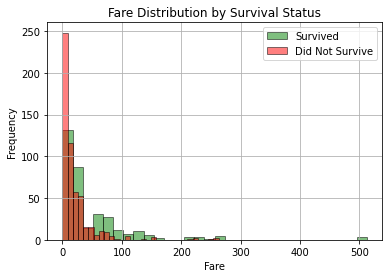

In [10]:
plt.figure(figsize=(6, 4))

plt.hist(train_data[train_data['Survived'] == 1]['Fare'], bins=30,
         alpha=0.5, label='Survived', color='green', edgecolor='black')
plt.hist(train_data[train_data['Survived'] == 0]['Fare'], bins=30,
         alpha=0.5, label='Did Not Survive', color='red', edgecolor='black')

plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()

- Lower fares seemed to have survived less.
- Higher fares seemed to survive more.
- This can be correlated with the socio-economic status of the passenger.

### Survival Counts by Sex
This bar chart displays the survival counts based on the passenger’s sex.


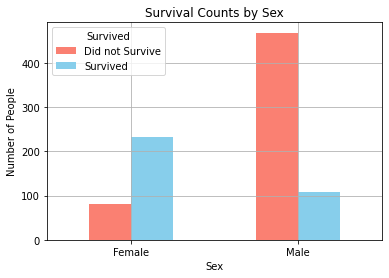

In [11]:
df = train_data.copy()
df['Sex_Label'] = df['Sex'].map({'male': 'Male', 'female': 'Female'})

survival_counts = df.groupby(['Sex_Label', 'Survived']).size().unstack()
survival_counts.plot(kind='bar', stacked=False,
                     figsize=(6, 4), color=['salmon', 'skyblue'])

plt.title('Survival Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Did not Survive', 'Survived'])
plt.grid(True)

plt.show()

- Females have a higher survival rate than males, which aligns with evacuation protocols that prioritized women and children.
- Males have a significantly lower survival rate, likely due to this prioritization.


### Survival Counts by Embarkation Point
This plot displays survival counts based on the port where passengers embarked: Southampton (S), Cherbourg (C), or Queenstown (Q).


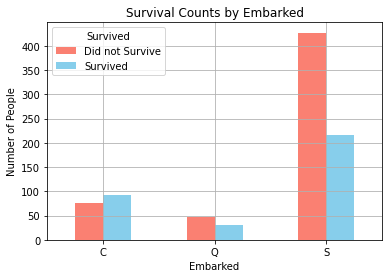

In [12]:
survival_counts = train_data.groupby(['Embarked', 'Survived']).size().unstack()

survival_counts.plot(kind='bar', stacked=False,
                     figsize=(6, 4), color=['salmon', 'skyblue'])

plt.title('Survival Counts by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Did not Survive', 'Survived'])
plt.grid(True)

plt.show()

- Passengers from Cherbourg (C) had the highest survival rates, possibly reflecting higher socio-economic status.
- Passengers from Southampton (S) had the lowest survival rates.


### Survival Counts by Passenger Class
This bar chart shows the survival counts based on passenger class (1st, 2nd, and 3rd class).


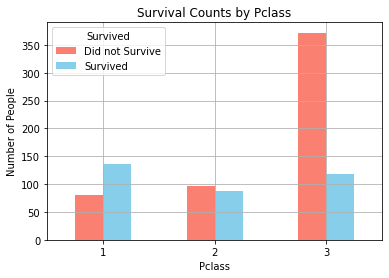

In [13]:
survival_counts = train_data.groupby(['Pclass', 'Survived']).size().unstack()

survival_counts.plot(kind='bar', stacked=False,
                     figsize=(6, 4), color=['salmon', 'skyblue'])

plt.title('Survival Counts by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Did not Survive', 'Survived'])
plt.grid(True)

plt.show()

- 1st class passengers have a high chance of survival, while 3rd class passengers have a high chance of dying.
- Socio-economic status seems to play a part for survival.

### Feature Engineering: Fill Missing Values
First, we identify missing values in the training and test datasets to determine the most appropriate imputation strategy for each feature.


In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in train data:

- Age (177 missing values)
- Cabin (687 missing values)
- Embarked (2 missing values)

In [15]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing values in test data:

- Age (86 missing values)
- Cabin (327 missing values)
- Fare (1 missing value)

### Combine Datasets
We combine the training and test data for consistent preprocessing and feature engineering. Later, we’ll split them back into separate datasets.


In [16]:
all_data = pd.concat([train_data, test_data])

**Update Sex to binary value** 

- I change the Sex feature to a binary value, 0 = male, 1 = female. Later, this will be changed to one-hot encoded values.

In [17]:
all_data['Sex'] = all_data['Sex'].map({'male':0,'female':1})

### Impute Missing Ages Using `Pclass`
To fill in missing `Age` values, we use the median age for each passenger class (`Pclass`) since `Pclass` is highly correlated with `Age`.


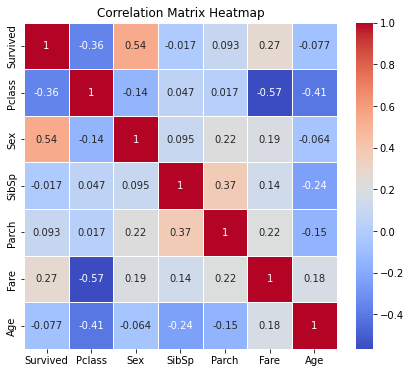

In [18]:
features = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]

# Only select rows without missing Age values
age_present = all_data[all_data['Age'].notna()]
age_data = age_present[features]

corr = age_data.corr()

plt.figure(figsize=(7, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- The highest correlated feature with Age is the Pclass. The missing `Age` values are filled with the median age for each `Pclass`, preserving meaningful differences in age distribution across classes.


In [19]:
median_ages = all_data.groupby("Pclass")['Age'].transform('median')
all_data['Age'] = all_data['Age'].fillna(median_ages)

### Extract Deck and Create Cabin Missing Indicator

- I replace this column with the following two features:
    - Deck: The first letter in the cabin number. Set to "U" if Cabin is missing.
    - CabinMissing: 1 if cabin is missing, 0 otherwise.

In [20]:
all_data['Deck'] = all_data['Cabin'].str[0].fillna('U')
all_data['CabinMissing'] = all_data['Cabin'].isna().astype(int)

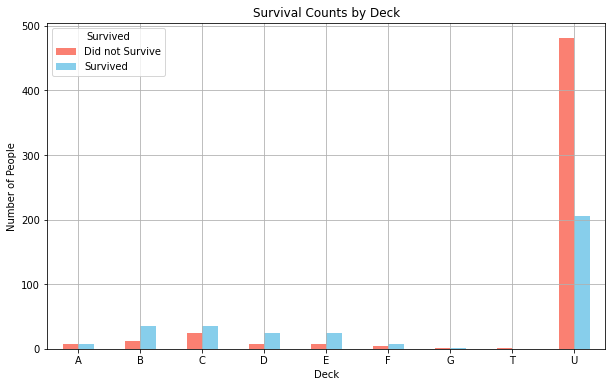

In [21]:
survival_counts = all_data[:891].groupby(['Deck','Survived']).size().unstack()

survival_counts.plot(kind='bar', stacked=False, figsize=(10,6), color = ['salmon','skyblue'])

plt.title('Survival Counts by Deck')
plt.xlabel('Deck')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Did not Survive', 'Survived'])
plt.grid(True)

plt.show()

- `Deck` is extracted from `Cabin` and filled with 'U' for missing values.
- The `CabinMissing` indicator helps capture missing information which may correlate with survival.


### Impute Missing Embarked Values



- I fill the missing values with the most common value for similar rows.
- There are only 2 missing values, so I set them to the mode embarked value of the passengers who are also female and on Deck "B".

In [22]:
missing_embarked = all_data[all_data["Embarked"].isna()]
missing_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,CabinMissing
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,B,0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,B,0


In [23]:
def mode_or_nan(series):
    mode = series.mode()
    return mode[0] if not mode.empty else np.nan

all_data['Embarked'] = all_data.groupby(['Sex','Deck'])['Embarked'].transform(lambda x: x.fillna(mode_or_nan(x)))

- Missing `Embarked` values are filled with the mode of similar rows based on `Sex` and `Deck`.


### Impute Missing Fare Values

- I fill the missing fare values with the mean fare value for the highest correlated feature, which is the Pclass.

In [24]:
all_data[all_data.Fare.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,CabinMissing
152,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,U,1


In [25]:
all_data["Fare"] = all_data.groupby("Pclass")["Fare"].transform(
    lambda x: x.fillna(x.mean())
)

- Missing `Fare` values are filled based on the mean fare of passengers in the same `Pclass`.


# New Features

### Create New Features
1. `TicketCount`: The number of passengers with the same ticket, indicating group size.
2. `FamilySize`: Combines `SibSp` and `Parch` to capture the family size.


In [26]:
all_data["TicketCount"] = all_data.groupby(
    "Ticket")["Ticket"].transform("count")

In [27]:
all_data["FamilySize"] = all_data["SibSp"] + all_data["Parch"] + 1

- `TicketCount` might indicate group size, which can impact survival probability.
- `FamilySize` can affect survival as passengers traveling alone may face different survival chances than those with family.


### Create IsAlone Feature
Create `IsAlone`, which is 1 if `FamilySize` is 1, indicating the passenger is traveling alone.

In [28]:
all_data["IsAlone"] = (all_data["FamilySize"] == 1).astype(int)

- `IsAlone` could reveal differences in survival rates based on whether a passenger is alone or with family.

### Create Age Bins
Bin `Age` into categorical ranges to simplify age-based differences in survival rates.


In [29]:
all_data["Age"].describe()

count    1309.000000
mean       29.207540
std        13.172381
min         0.170000
25%        22.000000
50%        26.000000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

In [30]:
bins = [x*10 for x in range(10)]
labels = range(1, len(bins))

all_data["AgeBin"] = pd.cut(
    all_data["Age"], bins=bins, labels=labels, right=False)

- `AgeBin` allows us to group passengers by age range, which can capture non-linear relationships between age and survival.


### Extract and Group Titles from Names

- This is extracted from the Name feature of each passenger.
- It seems to carry potential information such as their gender (Mr. for male, Mrs. for female) and their age (Master. is given to boys).

In [31]:
all_data["Title"] = all_data["Name"].apply(
    lambda x: x.split(',')[1].split()[0])
all_data["Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.', 'Dona.'], dtype=object)

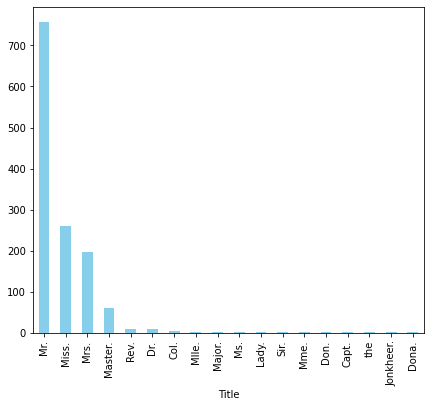

In [32]:
plt.figure(figsize=(7, 6))
all_data["Title"].value_counts().plot(kind='bar', color='skyblue')
plt.show()

In [33]:
match_list = ["the", "Jonkheer.", "Dona.", "Mlle.", "Mme.", "Don."]

all_data[all_data["Name"].apply(
    lambda x: x.split(',')[1].split()[0]).isin(match_list)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,CabinMissing,TicketCount,FamilySize,IsAlone,AgeBin,Title
30,31,0.0,1,"Uruchurtu, Don. Manuel E",0,40.0,0,0,PC 17601,27.7208,NaN,C,U,1,1,1,1,5,Don.
369,370,1.0,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,PC 17477,69.3000,B35,C,B,0,2,1,1,3,Mme.
641,642,1.0,1,"Sagesser, Mlle. Emma",1,24.0,0,0,PC 17477,69.3000,B35,C,B,0,2,1,1,3,Mlle.
710,711,1.0,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",1,24.0,0,0,PC 17482,49.5042,C90,C,C,0,1,1,1,3,Mlle.
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,33.0,0,0,110152,86.5000,B77,S,B,0,3,1,1,4,the
822,823,0.0,1,"Reuchlin, Jonkheer. John George",0,38.0,0,0,19972,0.0000,NaN,S,U,1,1,1,1,4,Jonkheer.
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,C,0,3,1,1,4,Dona.


- Jonkheer., Dona., Mlle., MMe. and Don. seem to be the names of passengers.
- "the" is for PassengerId 760. It's followed by the term "Countess".

I'll group together these titles by similarity into one of four groups:

- Mr
- Mrs/Miss
- Master
- Officer/Professional

In [34]:
replacements = {
    'Mr.': 'Mr',
    'Mrs.': 'Mrs/Miss',
    'Miss.': 'Mrs/Miss',
    'Master.': 'Master',
    'Don.': 'Mr',
    'Rev.': 'Officer/Professional',
    'Dr.': 'Officer/Professional',
    'Mme.': 'Mrs/Miss',
    'Ms.': 'Mrs/Miss',
    'Major.': 'Officer/Professional',
    'Lady.': 'Mrs/Miss',
    'Sir.': 'Mr',
    'Mlle.': 'Mrs/Miss',
    'Col.': 'Officer/Professional',
    'Capt.': 'Officer/Professional',
    'the': 'Mrs/Miss',
    'Jonkheer.': 'Mr',
    'Dona.': 'Mrs/Miss'
}

all_data["Title"] = all_data["Title"].replace(replacements)

all_data["Title"].unique()

array(['Mr', 'Mrs/Miss', 'Master', 'Officer/Professional'], dtype=object)

- Titles can provide insight into social status or gender and age (e.g., Master for young boys).


### One-Hot Encode Categorical Variables
Convert categorical variables (e.g., `Pclass`, `Title`, `Embarked`, `AgeBin`) into one-hot encoded features for model compatibility.


In [35]:
one_hot_columns = ["Pclass", "Title", "Embarked", "Deck", "Sex"]

encoder = OneHotEncoder(sparse_output=False, dtype=int)
encoded_features = encoder.fit_transform(all_data[one_hot_columns])
encoded_df = pd.DataFrame(
    encoded_features, columns=encoder.get_feature_names_out(one_hot_columns))
encoded_df.index = all_data.index

In [36]:
df_final = pd.concat([all_data, encoded_df], axis=1)

In [37]:
df_final.columns 
# Convert categorical columns to one-hot encoding or label encoding
# One-hot encode AgeBin
df_final = pd.get_dummies(df_final, columns=["AgeBin"])

In [38]:
df_final.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck', 'CabinMissing',
       'TicketCount', 'FamilySize', 'IsAlone', 'Title', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Title_Master', 'Title_Mr', 'Title_Mrs/Miss',
       'Title_Officer/Professional', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Deck_U', 'Sex_0', 'Sex_1', 'AgeBin_1', 'AgeBin_2',
       'AgeBin_3', 'AgeBin_4', 'AgeBin_5', 'AgeBin_6', 'AgeBin_7', 'AgeBin_8',
       'AgeBin_9'],
      dtype='object')

- One-hot encoding allows categorical data to be represented numerically, making it suitable for model input.


### Drop Irrelevant Columns
Remove columns that are no longer needed after feature engineering (e.g., original categorical columns and IDs).


In [39]:
drop_cols = ["Ticket", "Cabin", "Name", "PassengerId", "Age",
             "SibSp", "Parch", "Pclass", "Embarked", "Title", "Deck", "Sex"]

df_final.drop(columns=drop_cols, inplace=True)

- Dropping these columns reduces dimensionality, keeping only relevant engineered features.


In [40]:
df_final.columns

Index(['Survived', 'Fare', 'CabinMissing', 'TicketCount', 'FamilySize',
       'IsAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Master',
       'Title_Mr', 'Title_Mrs/Miss', 'Title_Officer/Professional',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U', 'Sex_0',
       'Sex_1', 'AgeBin_1', 'AgeBin_2', 'AgeBin_3', 'AgeBin_4', 'AgeBin_5',
       'AgeBin_6', 'AgeBin_7', 'AgeBin_8', 'AgeBin_9'],
      dtype='object')

In [41]:
df_final.head()

,Survived,Fare,CabinMissing,TicketCount,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3,Title_Master,...,Sex_1,AgeBin_1,AgeBin_2,AgeBin_3,AgeBin_4,AgeBin_5,AgeBin_6,AgeBin_7,AgeBin_8,AgeBin_9
0,0.0,7.2500,1,1,2,0,0,0,1,0,...,0,False,False,True,False,False,False,False,False,False
1,1.0,71.2833,0,2,2,0,1,0,0,0,...,1,False,False,False,True,False,False,False,False,False
2,1.0,7.9250,1,1,1,1,0,0,1,0,...,1,False,False,True,False,False,False,False,False,False
3,1.0,53.1000,0,2,2,0,1,0,0,0,...,1,False,False,False,True,False,False,False,False,False
4,0.0,8.0500,1,1,1,1,0,0,1,0,...,0,False,False,False,True,False,False,False,False,False


### Split Data Back into Train and Test Sets
After feature engineering, separate the data back into training and test sets for model training and evaluation.


In [42]:
# Split the data back into the train and test sets
df_train = df_final[:891]
df_test = df_final[891:]

In [43]:
print(df_train.shape)
print(df_test.shape)

(891, 36)
(418, 36)


In [44]:
df_test.drop(columns=['Survived'], inplace=True)

In [45]:
X_train = df_train.drop(columns="Survived")
y_train = df_train["Survived"].values

X_test = df_test

- Data is split back into training and testing sets with the target variable (`Survived`) separated for training.


In [46]:
X_train.head()

,Fare,CabinMissing,TicketCount,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Mr,...,Sex_1,AgeBin_1,AgeBin_2,AgeBin_3,AgeBin_4,AgeBin_5,AgeBin_6,AgeBin_7,AgeBin_8,AgeBin_9
0,7.2500,1,1,2,0,0,0,1,0,1,...,0,False,False,True,False,False,False,False,False,False
1,71.2833,0,2,2,0,1,0,0,0,0,...,1,False,False,False,True,False,False,False,False,False
2,7.9250,1,1,1,1,0,0,1,0,0,...,1,False,False,True,False,False,False,False,False,False
3,53.1000,0,2,2,0,1,0,0,0,0,...,1,False,False,False,True,False,False,False,False,False
4,8.0500,1,1,1,1,0,0,1,0,1,...,0,False,False,False,True,False,False,False,False,False


# Model Selection and Hyperparameter Tuning

We use various machine learning algorithms to predict Titanic survival, including:
- **Random Forest**: A robust ensemble method that performs well on tabular data.
- **Logistic Regression**: A simple, interpretable linear model often used in binary classification.
- **Artificial Neural Network (ANN)**: A basic neural network that can capture complex patterns.
- **Decision Tree**: A non-linear model that performs well with high interpretability.
- **Support Vector Machine (SVM)**: A powerful classification algorithm that creates decision boundaries.
- **k-Nearest Neighbors (k-NN)**: A non-parametric method that relies on feature similarity.
- **Naive Bayes**: A simple probabilistic classifier based on Bayes' theorem.
- **AdaBoost and Gradient Boosting**: Ensemble methods that iteratively improve weak learners.
- **XGBoost and CatBoost**: Gradient-boosting models optimized for performance on structured data.

For each model, we define a parameter grid for `GridSearchCV` to perform hyperparameter tuning and select the best combination of parameters using cross-validation. This will optimize each model’s performance by finding the most suitable parameter values.


In [47]:
# Define all models with base parameters for GridSearchCV
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Artificial Neural Network': MLPClassifier(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(criterion='gini'),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(verbose=0)
}

This dictionary contains the initialized models, each with some default parameters to be further tuned with `GridSearchCV`. Each model has different characteristics that may contribute to improved performance in predicting survival on the Titanic dataset.


### Defining Parameter Grids for GridSearchCV

Here, we define the parameter grids for each model. These grids contain values for each hyperparameter to test during cross-validation. Notable parameters for each model include:
- **Random Forest**: Number of estimators (trees), maximum tree depth, minimum samples per split, etc.
- **Logistic Regression**: Regularization strength, solver type, and maximum iterations.
- **Artificial Neural Network**: Number of hidden layers, activation function, learning rate, and maximum iterations.
- **Support Vector Machine**: Penalty parameter (C), kernel type, and gamma for non-linear kernels.
- **AdaBoost** and **Gradient Boosting**: Learning rate, number of estimators, and parameters for weak learners.
- **XGBoost and CatBoost**: Number of boosting iterations, learning rate, and regularization parameters, among others.

These parameter grids will be used in `GridSearchCV` to test multiple combinations, identifying the optimal parameter set for each model.


In [48]:
# Define parameter grids for models that will use GridSearchCV
param_grids = {
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Logistic Regression': {'C': [0.01, 0.1, 0.5, 1.0, 10], 'solver': ['liblinear', 'lbfgs', 'saga'],'penalty': ['l1', 'l2', 'elasticnet'], 'max_iter': [100, 200, 300]},
    'Artificial Neural Network': {'hidden_layer_sizes': [(50, 30), (100,),(100, 50),(150, 100, 50)], 'solver': ['adam','sgd'], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate': ['constant', 'adaptive'], 'max_iter': [200, 300, 500]},
    'Decision Tree': {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy', 'log_loss']},
    'Support Vector Machine': {'C': [0.1, 0.5, 1.0, 10], 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto']},
    'k-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']},
    'Naive Bayes': {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]},  # Test different levels of variance smoothing
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0, 1.5]},
    'Gradient Boosting': {'n_estimators': [100, 150, 200, 300], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.7, 0.8, 1.0], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'n_estimators': [100, 150, 200, 300], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.7, 0.8, 1.0], 'colsample_bytree': [0.5, 0.8, 1.0], 'gamma': [0, 0.1, 0.3], 'reg_alpha': [0, 0.01, 0.1], 'reg_lambda': [1, 1.5, 2]},
    'CatBoost': {'iterations': [100, 150, 200, 300],  'learning_rate': [0.01, 0.05, 0.1, 0.2],  'depth': [3, 5, 7, 10], 'l2_leaf_reg': [1, 3, 5, 7], 'bagging_temperature': [0.0, 0.5, 1.0], 'border_count': [32, 64, 128]}
}

The parameters defined in each grid cover a range of potential values, allowing `GridSearchCV` to find the most effective hyperparameters through cross-validation.


### Train Models and Perform Hyperparameter Tuning

For each model, we use `GridSearchCV` to search for the optimal hyperparameters through 5-fold cross-validation. The best-performing model for each algorithm is then selected based on the highest cross-validation accuracy.


In [49]:
# Track performance of each model
model_performance = []

# Split the data into training and validation sets
train_x, X_val, train_y, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Get the parameter grid for the model
    param_grid = param_grids.get(model_name, {})

    # Initialize best model
    best_model = model

    # If there are parameters to tune, use GridSearchCV
    if param_grid:
        grid_search_cv = GridSearchCV(
            estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=0)
        grid_search_cv.fit(train_x, train_y)

        # Extract the best model and parameters
        best_model = grid_search_cv.best_estimator_
        best_params = grid_search_cv.best_params_
        best_score = grid_search_cv.best_score_

        print(f"Best Parameters for {model_name}: {best_params}")
        print(
            f"Best Cross-Validation Accuracy for {model_name}: {best_score:.4f}")
    else:
        # If no parameters to tune, fit model as-is
        best_model.fit(train_x, train_y)

    # Predict on validation set with best model
    y_pred = best_model.predict(X_val)

    # Calculate accuracy and detailed metrics
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)

    print(f"{model_name} Validation Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("\n" + "="*50 + "\n")

    # Append results to model_performance list
    model_performance.append({
        'Model': model_name,
        'Best Parameters': best_params if param_grid else "Default",
        'Cross-Validation Accuracy': best_score if param_grid else "Not Applicable",
        'Validation Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    })


Training Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy for Random Forest: 0.8371
Random Forest Validation Accuracy: 0.8380
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       105
         1.0       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[90 15]
 [14 60]]


Training Logistic Regression...
Best Parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy for Logistic Regression: 0.8315
Logistic Regression Validation Accuracy: 0.8324
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       105
         1.0       0.80      

Each model is trained and evaluated on the validation set, with the best-performing hyperparameters applied. Performance metrics, including accuracy, precision, recall, and F1-score, are recorded for comparison.


# Evaluate and Compare Model Performance

After training, we compare all models based on validation accuracy to identify the best-performing model for Titanic survival prediction.


In [50]:
# Convert results to a DataFrame for better comparison
performance_df = pd.DataFrame(model_performance).sort_values(
    by='Cross-Validation Accuracy', ascending=False)
performance_df

,Model,Best Parameters,Cross-Validation Accuracy,Validation Accuracy,Precision,Recall,F1 Score
10,CatBoost,"{'bagging_temperature': 0.0, 'border_count': 6...",0.856732,0.843575,0.843025,0.843575,0.842865
9,XGBoost,"{'colsample_bytree': 0.5, 'gamma': 0, 'learnin...",0.851128,0.837989,0.837708,0.837989,0.837822
8,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'min_sa...",0.849739,0.815642,0.815314,0.815642,0.815452
0,Random Forest,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.837083,0.837989,0.838354,0.837989,0.838145
2,Artificial Neural Network,"{'alpha': 0.0001, 'hidden_layer_sizes': (50, 3...",0.834256,0.832402,0.831923,0.832402,0.831189
1,Logistic Regression,"{'C': 10, 'max_iter': 100, 'penalty': 'l2', 's...",0.831469,0.832402,0.832402,0.832402,0.832402
7,AdaBoost,"{'learning_rate': 1.0, 'n_estimators': 200}",0.830060,0.815642,0.817096,0.815642,0.816138
4,Support Vector Machine,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.830011,0.826816,0.826124,0.826816,0.825802
3,Decision Tree,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.823097,0.826816,0.826149,0.826816,0.826244
5,k-Nearest Neighbors,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.800561,0.810056,0.809194,0.810056,0.808681


This DataFrame ranks the models based on validation accuracy, allowing us to easily see which model performed the best on the validation set.


### Select and Train the Best Model

Based on validation accuracy, we choose the best model (e.g., Gradient Boosting). This model is then retrained on the full training data using the best hyperparameters from `GridSearchCV`.


In [51]:
best_model = performance_df.iloc[0]['Model']
print(f"Best Model: {best_model}")
print(f"Best Model Parameters: {performance_df.iloc[0]['Best Parameters']}")

# Retrieve the best parameters and model
best_params = param_grids[best_model]
best_model = models[best_model]

# Re-run GridSearchCV on the full training data to use the best parameters for the best model
grid_search_cv = GridSearchCV(estimator=best_model, param_grid=best_params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)

# Get the best estimator from grid search
final_model = grid_search_cv.best_estimator_

Best Model: CatBoost
Best Model Parameters: {'bagging_temperature': 0.0, 'border_count': 64, 'depth': 3, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


The best model is selected and retrained on the entire training set with the optimal parameters. This final model will be used to make predictions on the test data.


### Generate Predictions and Create Submission File

Using the final trained model, we predict survival outcomes on the test dataset and save the results in a CSV file for Kaggle submission.


In [52]:
# Make predictions on the test data
prediction = final_model.predict(X_test)

# Create a submission file
submission = pd.DataFrame(
    {'PassengerId': test_data.PassengerId, 'Survived': prediction})
submission.to_csv('titanic_submission_all_comparision.csv', index=False)